# 01 — Data Overview & Panel Validation

## Economic Question
Is the constructed macroeconomic dataset complete, consistent, and suitable
for cross-country time-series analysis of euro-area retail dynamics?

## Data & Scope
- Countries: EA7 (DE, FR, IT, ES, NL, AT, FI)
- Frequency: Monthly
- Period: 2010-01 to 2023-12
- Sources:
  - Eurostat: Retail Trade Index, HICP, Consumer Confidence
  - FRED: Global financial indicators
- Structure: Balanced country–month panel

## Objective of This Notebook
Before conducting any economic analysis, we validate:
1. Panel balance and coverage
2. Missing values
3. Basic distributional properties
4. Time consistency

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

In [2]:
df = pd.read_csv("../data/processed/macro_panel.csv")

df["month_dt"] = pd.to_datetime(df["month"])
df = df.sort_values(["country", "month_dt"]).reset_index(drop=True)

df.head()

,country,month,rti_index,hicp_index,hfce,cci,us_cpi,us_unemployment,us_fed_funds,us_industrial_prod,month_dt
0,AT,2010-01,99.5,108.12,NaN,-4.9,217.488,9.8,0.11,89.3426,2010-01-01
1,AT,2010-02,100.7,108.34,NaN,-4.6,217.281,9.8,0.13,89.6779,2010-02-01
2,AT,2010-03,100.7,109.46,NaN,-8.6,217.353,9.9,0.16,90.2928,2010-03-01
3,AT,2010-04,99.9,109.69,NaN,-5.8,217.403,9.9,0.20,90.5991,2010-04-01
4,AT,2010-05,99.4,109.63,NaN,-9.9,217.290,9.6,0.20,91.8230,2010-05-01


In [3]:
print("Total observations:", len(df))
print("Countries:", df["country"].nunique())
print("Min month:", df["month"].min())
print("Max month:", df["month"].max())

df.groupby("country")["month"].count()

Total observations: 1176
Countries: 7
Min month: 2010-01
Max month: 2023-12


country
AT    168
DE    168
ES    168
FI    168
FR    168
IT    168
NL    168
Name: month, dtype: int64

## Panel Structure Validation

The dataset forms a **balanced macro panel**:

- 7 countries × 168 months = **1,176 observations**
- Identical time coverage across all countries
- No country enters or exits the sample

This structure is essential for:
- Cross-country comparison
- Fixed-effects analysis
- Rolling-window and regime analysis

In [4]:
missing = (
    df.isna()
      .sum()
      .to_frame("missing_count")
      .assign(missing_share=lambda x: x["missing_count"] / len(df))
)

missing.sort_values("missing_share", ascending=False)

,missing_count,missing_share
hfce,1176,1.00000
cci,1,0.00085
country,0,0.00000
month,0,0.00000
rti_index,0,0.00000
hicp_index,0,0.00000
us_cpi,0,0.00000
us_unemployment,0,0.00000
us_fed_funds,0,0.00000
us_industrial_prod,0,0.00000


## Missing Values Assessment

- All core variables (retail, inflation, confidence, financial indicators)
  have **near-zero or zero missing values**
- HFCE (household consumption) is entirely missing at monthly frequency

### Note on HFCE
HFCE is originally reported **annually** by Eurostat.
While it can be mechanically expanded to monthly frequency,
it contains no genuine intra-year variation.

➡️ **HFCE is therefore excluded from further analysis**  
This preserves economic integrity and avoids artificial signals.

In [5]:
numeric_cols = [
    "rti_index",
    "hicp_index",
    "cci",
    "us_cpi",
    "us_unemployment",
    "us_fed_funds",
    "us_industrial_prod",
]

df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
rti_index,1176.0,103.861990,7.731165,69.7000,99.00000,102.4000,108.30000,127.1000
hicp_index,1176.0,122.978588,10.123865,105.5200,116.42500,121.1900,125.94250,161.7000
cci,1175.0,-10.410128,8.958439,-40.5000,-16.40000,-9.2000,-3.55000,7.0000
us_cpi,1176.0,249.877536,24.323323,217.1990,232.92775,243.1275,259.15775,308.7350
us_unemployment,1176.0,5.924405,2.257287,3.4000,3.90000,5.1000,7.72500,14.8000
us_fed_funds,1176.0,0.949702,1.401871,0.0500,0.09000,0.1650,1.44250,5.3300
us_industrial_prod,1176.0,99.089273,3.557745,84.5619,97.70605,100.0944,101.33400,104.1004


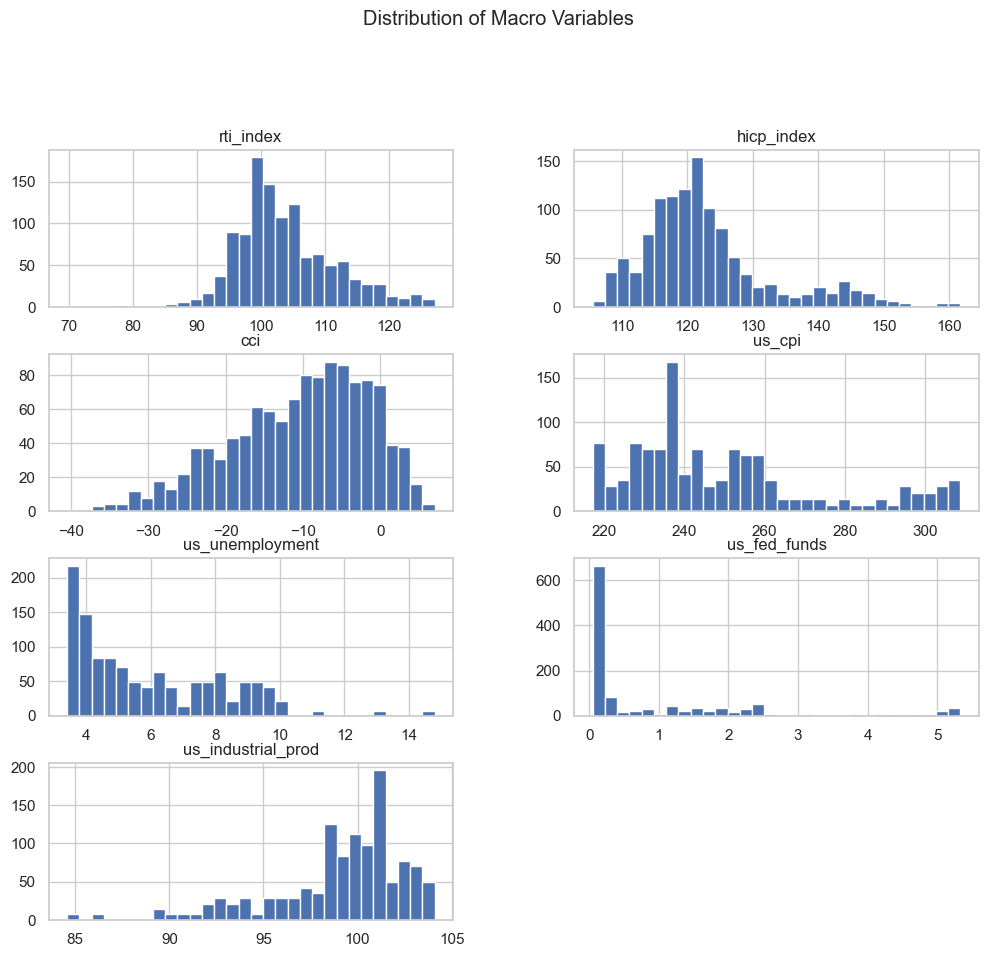

In [6]:
df[numeric_cols].hist(bins=30, layout=(4, 2), figsize=(12, 10))
plt.suptitle("Distribution of Macro Variables", y=1.02)
plt.show()

## Distributional Properties

Key observations:

- Retail Trade Index shows moderate dispersion with clear cyclical behavior
- Inflation (HICP) trends upward over time, reflecting long-run price growth
- Consumer confidence is centered below zero, reflecting persistent pessimism
- US financial indicators show distinct regime shifts

No extreme outliers or data quality issues are observed.

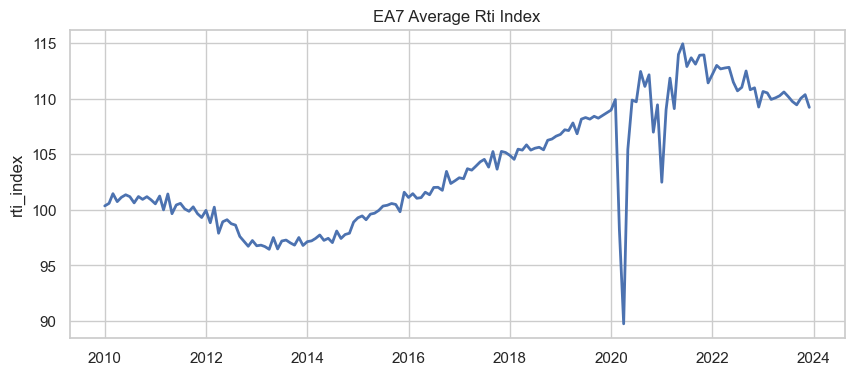

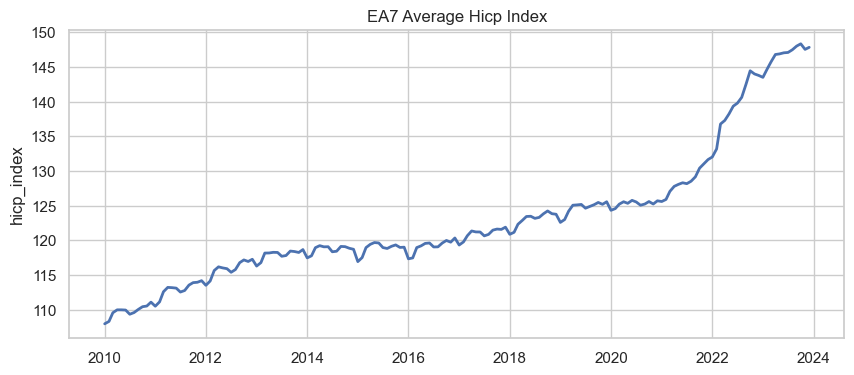

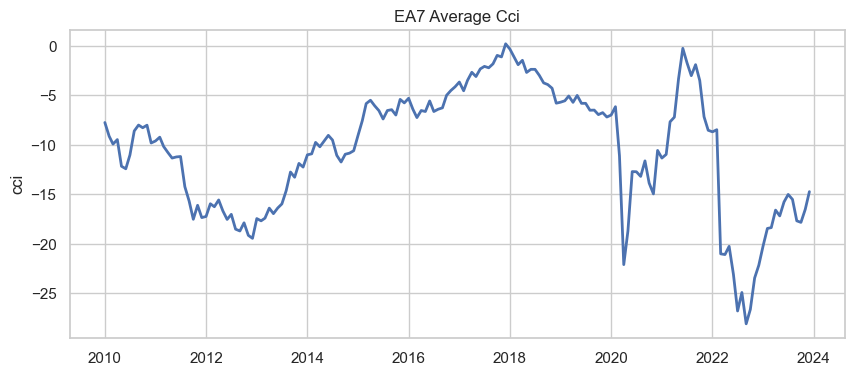

In [7]:
for var in ["rti_index", "hicp_index", "cci"]:
    plt.figure()
    sns.lineplot(
        data=df.groupby("month_dt")[var].mean(),  # type: ignore
        linewidth=2
    )
    plt.title(f"EA7 Average {var.replace('_', ' ').title()}")
    plt.xlabel("")
    plt.show()

## Time Consistency

- All variables evolve smoothly over time
- Major macroeconomic events are clearly visible:
  - Global Financial Crisis aftermath
  - COVID-19 shock
  - Post-2021 inflation surge

The data behaves as expected for official macroeconomic indicators.

## Key Takeaways

- The dataset is **clean, balanced, and well-structured**
- No material missing-data issues affect core variables
- Time-series behavior aligns with known economic events
- The panel is suitable for:
  - Cross-country comparisons
  - Dynamic analysis
  - Econometric and ML applications

## Link to Next Notebook
➡️ **Notebook 02 — Retail Trade Dynamics**  
We now analyze how retail activity evolves across countries and over time.